# **Introduction**

**Problem Statement**

Predict the number of covid cases per region based off of demographic!

**Lets Get Coding!!**

![](https://ewscripps.brightspotcdn.com/dims4/default/7ee8cb6/2147483647/strip/true/crop/1280x720+0+0/resize/1280x720!/quality/90/?url=http%3A%2F%2Fewscripps-brightspot.s3.amazonaws.com%2F72%2F52%2F83d95c7b4318a34a8373c722bc6b%2Fcoronavirus-background-1280x720-1.jpg)

# **Imports**

**Lets first import some modules**.....

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nmlo-contest-3/test.csv
/kaggle/input/nmlo-contest-3/sample.csv
/kaggle/input/nmlo-contest-3/train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/nmlo-contest-3/train.csv')
test_data = pd.read_csv('/kaggle/input/nmlo-contest-3/test.csv')
train = train_data.copy()
test = test_data.copy()

In [3]:
train.head()

,id,ed,inc,pop,cases
0,0,27.7,59338.0,55869.0,789
1,3,11.5,46064.0,22394.0,255
2,4,12.6,50412.0,57826.0,440
3,5,13.3,29267.0,10101.0,393
4,6,16.1,37365.0,19448.0,672


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1947 non-null   int64  
 1   ed      1947 non-null   float64
 2   inc     1947 non-null   float64
 3   pop     1947 non-null   float64
 4   cases   1947 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 76.2 KB


In [5]:
train.shape

(1947, 5)

In [6]:
train.isnull().sum()

id       0
ed       0
inc      0
pop      0
cases    0
dtype: int64

# **EDA**

Let's some some data exploration!

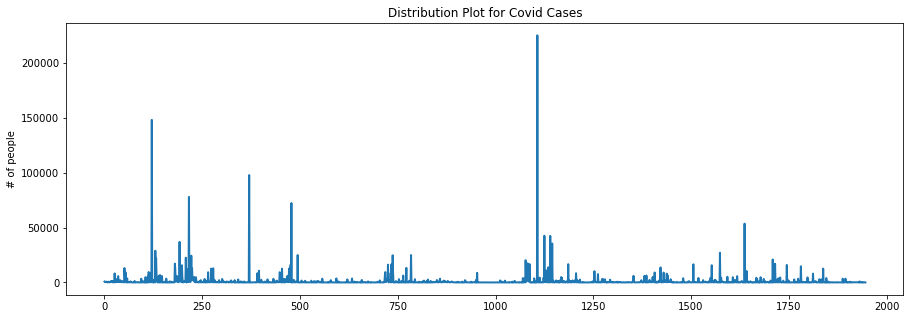

In [7]:
plt.figure(figsize=(15,5))
plt.plot(train.cases,linewidth=2,color=next(color_cycle))
plt.title('Distribution Plot for Covid Cases')
plt.ylabel('# of people');

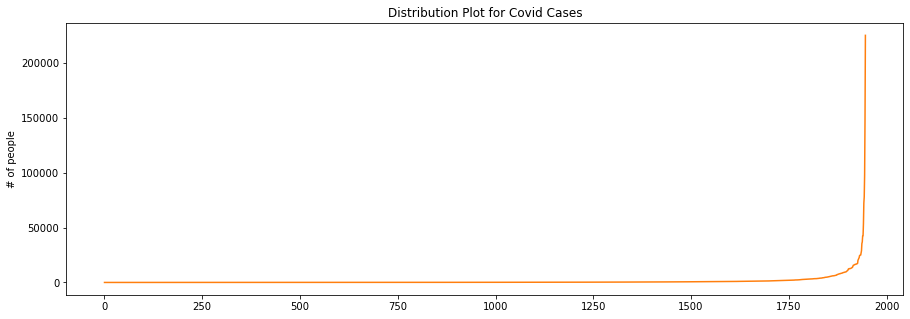

In [8]:
plt.figure(figsize=(15,5))
plt.plot(train.cases.sort_values().reset_index(drop=True),color=next(color_cycle))
plt.title('Distribution Plot for Covid Cases')
plt.ylabel('# of people');

**Looks like there is a huge spike of cases at the end.**

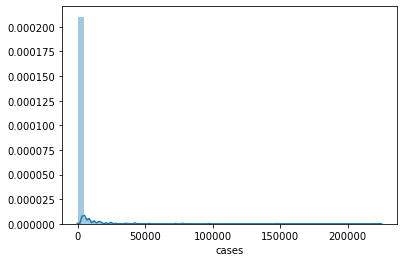

In [9]:
sns.distplot(train['cases']);

In [10]:
train['cases'].max()

225000

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1947 non-null   int64  
 1   ed      1947 non-null   float64
 2   inc     1947 non-null   float64
 3   pop     1947 non-null   float64
 4   cases   1947 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 76.2 KB


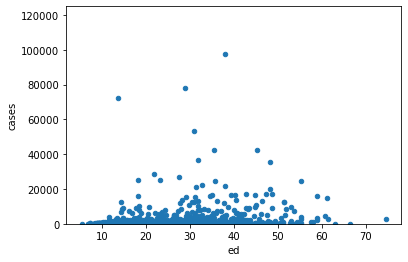

In [12]:
var = 'ed'
data = pd.concat([train['cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='cases', ylim=(0,125000));

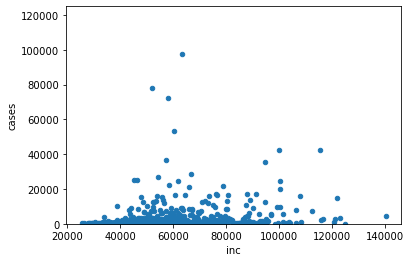

In [13]:
var = 'inc'
data = pd.concat([train['cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='cases', ylim=(0,125000));

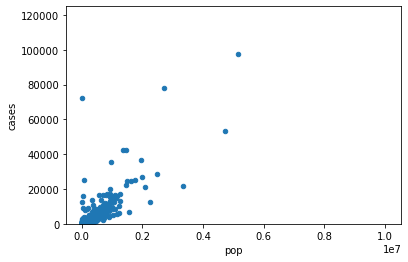

In [14]:
#scatter plot grlivarea/saleprice
var = 'pop'
data = pd.concat([train['cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='cases', ylim=(0,125000));

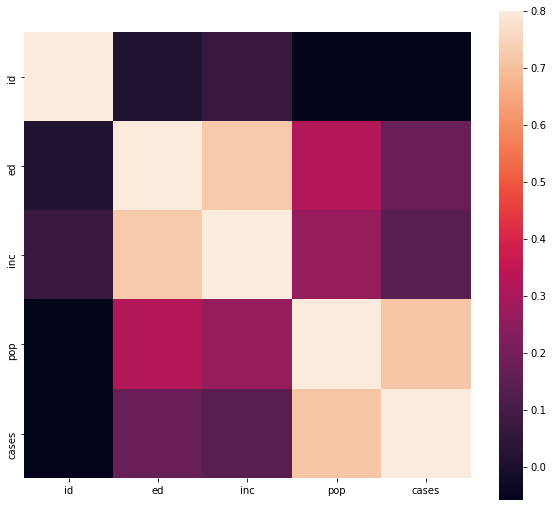

In [15]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

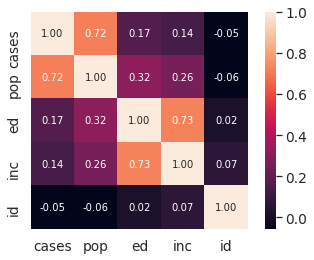

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'cases')['cases'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
cases_scaled = StandardScaler().fit_transform(train['cases'][:,np.newaxis]);
low_range = cases_scaled[cases_scaled[:,0].argsort()][:10]
high_range= cases_scaled[cases_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.17385952]
 [-0.17385952]
 [-0.17385952]
 [-0.17385952]
 [-0.17385952]
 [-0.17385952]
 [-0.17385952]
 [-0.17385952]
 [-0.17385952]
 [-0.17385952]]

outer range (high) of the distribution:
[[ 4.44529305]
 [ 4.63429509]
 [ 5.34666736]
 [ 5.36920171]
 [ 6.80202215]
 [ 9.24107329]
 [ 9.96868556]
 [12.56391414]
 [19.10408813]
 [29.13383117]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


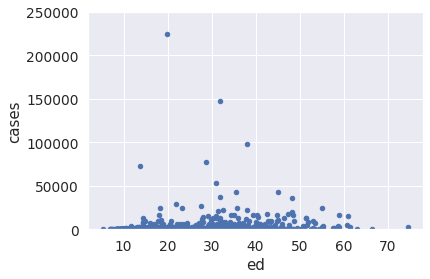

In [19]:
#bivariate analysis saleprice/grlivarea
var = 'ed'
data = pd.concat([train['cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='cases', ylim=(0,250000));

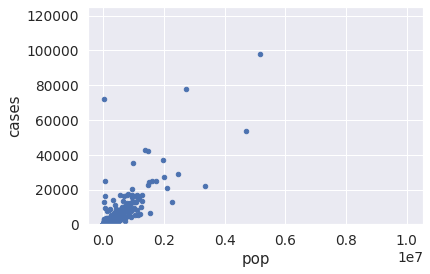

In [20]:
var = 'pop'
data = pd.concat([train['cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='cases', ylim=(0,125000));

In [21]:
from scipy.stats import norm, skew
from scipy import stats

In [22]:
test.head()

,ed,inc,pop
0,31.3,57588.0,223234.0
1,12.2,34382.0,24686.0
2,18.0,45400.0,113605.0
3,12.9,42132.0,26196.0
4,13.0,39907.0,12589.0


In [23]:
train['cases'].replace([0], 1, inplace = True)

train['ed'].replace([0], 1, inplace = True)
train['inc'].replace([0], 1, inplace = True)
train['pop'].replace([0], 1, inplace = True)
print((train['cases']==0).value_counts())
test['ed'].replace([0], 1, inplace = True)

test['inc'].replace([0], 1, inplace = True)
test['pop'].replace([0], 1, inplace = True)

False    1947
Name: cases, dtype: int64


In [24]:


train['cases'] = np.log(train['cases'])


In [25]:
train['cases'].max()

12.323855681186558

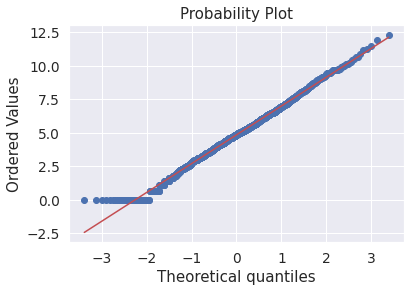

In [26]:
res = stats.probplot(train['cases'], plot=plt)

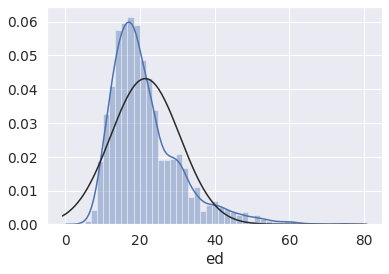

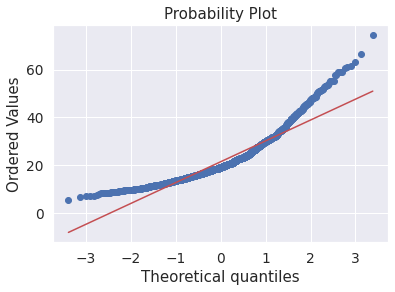

In [27]:
sns.distplot(train['ed'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['ed'], plot=plt)

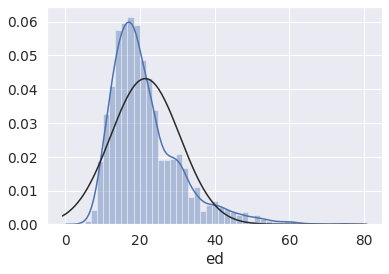

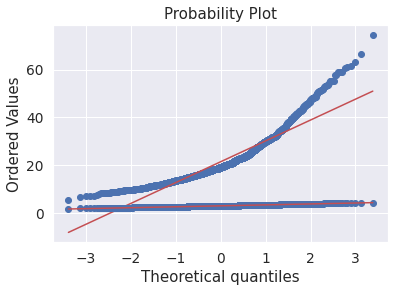

In [28]:
#transformed histogram and normal probability plot
sns.distplot(train['ed'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['ed'], plot=plt)
train['ed'] = np.log(train['ed'])
test['ed'] = np.log(test['ed'])
res = stats.probplot(train['ed'], plot=plt)

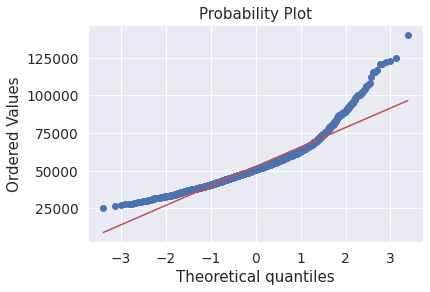

In [29]:
res = stats.probplot(train['inc'], plot=plt)
train['inc'] = np.log(train['inc'])
test['inc'] = np.log(test['inc'])


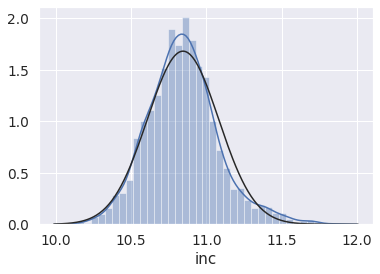

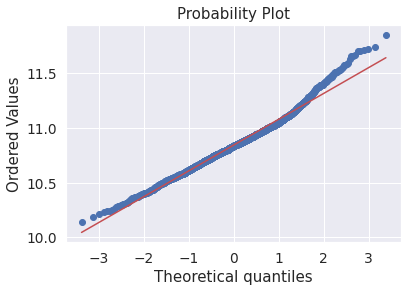

In [30]:
sns.distplot(train['inc'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['inc'], plot=plt)

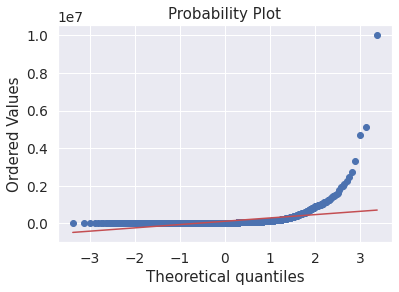

In [31]:
res = stats.probplot(train['pop'], plot=plt)

train['pop'] = np.log(train['pop'])
test['pop'] = np.log(test['pop'])


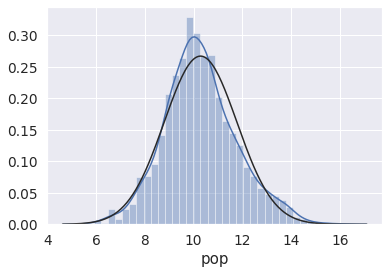

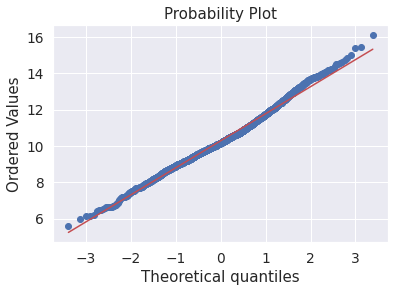

In [32]:
sns.distplot(train['pop'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['pop'], plot=plt)

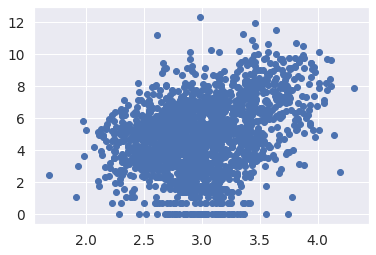

In [33]:
plt.scatter(train['ed'], train['cases']);

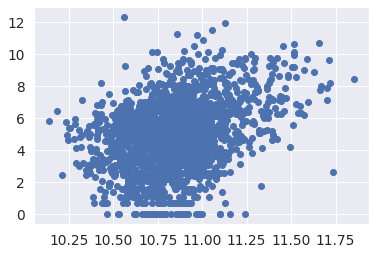

In [34]:
plt.scatter(train['inc'], train['cases']);

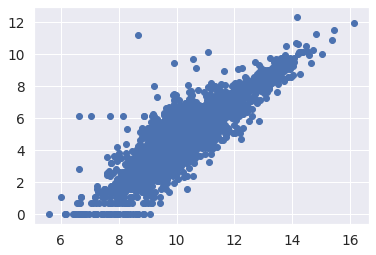

In [35]:
plt.scatter(train['pop'], train['cases']);

# **Skew**

In [36]:
numeric_feats = train.dtypes[train.dtypes != "object"].index


skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
inc,0.481797
pop,0.312173
ed,0.311744
cases,0.051797
id,-0.017369


In [37]:
#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:
#    #all_data[feat] += 1
#    train[feat] = boxcox1p(train[feat], lam)

In [38]:
train = pd.get_dummies(train)
print(train.shape)

(1947, 5)


In [39]:
train.head()

,id,ed,inc,pop,cases
0,0,3.321432,10.991005,10.930765,6.670766
1,3,2.442347,10.737787,10.016548,5.541264
2,4,2.533697,10.827985,10.965194,6.086775
3,5,2.587764,10.284216,9.220390,5.973810
4,6,2.778819,10.528490,9.875500,6.510258


# **Modeling**

We are first going to split our data into different train and test subests using train-test-split

In [40]:
from sklearn.model_selection import train_test_split      

In [41]:
train_y = train['cases']
train.drop('id', axis = 1, inplace = True)
train.drop('cases', axis = 1, inplace = True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.2, shuffle=True)

**Lets import**

In [43]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [44]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# **Lasso**

In [45]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [46]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [47]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


In [48]:
GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [50]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [51]:
model_xgb.fit(X_train, y_train)

[14:38:02] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
xg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=np.nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)




In [53]:
score_lasso = rmsle_cv(lasso)
score_lasso.mean()
#print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



1.0123749426032018

In [54]:
score = rmsle_cv(model_xgb)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


[14:38:03] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:38:04] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:38:05] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


In [55]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1.0124 (0.0670)



In [56]:
score = rmsle_cv(model_lgb)
print(" score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 score: 1.0547 (0.0570)



In [57]:
score = rmsle_cv(lasso)
print(" score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 score: 1.0124 (0.0670)



In [58]:
score = rmsle_cv(GBoost)
GBoost.fit(X_train, y_train)
sample = GBoost.predict(test)
sample = np.exp(sample)
print(" score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 score: 1.0617 (0.0510)



In [59]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [60]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

averaged_models.fit(X_train, y_train)
submission = averaged_models.predict(test)
submission = np.exp(submission)
#xgb_train_pred = averaged_models.predict(X_train)
#xgb_pred = np.expm1(averaged_models.predict(test))
#print(rmsle(y_train, xgb_train_pred))

 Averaged base models score: 1.0088 (0.0623)



In [61]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

In [62]:


stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: nan (nan)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-61-2aa4dfd43e52>", line 20, in fit
    instance.fit(X[train_index], y[train_index])
  File "/opt/conda/lib/python3.7/site-packages/pandas/core/series.py", line 908, in __getitem__
    return self._get_with(key)
  File "/opt/conda/lib/python3.7/site-packages/pandas/core/series.py", line 943, in _get_with
    return self.loc[key]
  File "/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py", line 879, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py", line 

In [63]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [64]:
#stacked_averaged_models.fit(X_train, y_train)
#stacked_train_pred = stacked_averaged_models.predict(X_train)
#stacked_pred = np.expm1(stacked_averaged_models.predict(X_test))
#print(rmsle(y_train, stacked_train_pred))

In [65]:
test.shape
test.head()

,ed,inc,pop
0,3.443618,10.961069,12.315976
1,2.501436,10.445288,10.113992
2,2.890372,10.723267,11.640483
3,2.557227,10.648563,10.173362
4,2.564949,10.594307,9.440579


# **Predictions**

In [66]:
I decided to use the stock lasso regression. Xgboost and Lgb were both banned for this competition.

SyntaxError: invalid syntax (<ipython-input-66-b8cf43016e62>, line 1)

In [67]:
sub = pd.DataFrame()
sub['id'] = range(0,993)
sub['cases'] = sample
sub.to_csv('submission.csv',index=False)
print(sub)

      id        cases
0      0  1486.215007
1      1   335.457859
2      2   987.675912
3      3   176.880529
4      4    32.365714
..   ...          ...
988  988    76.724696
989  989    76.535237
990  990    28.211748
991  991    90.824200
992  992    13.979371

[993 rows x 2 columns]


**Thank you for viewing my notebook!**
**I hope you found this informative**



If you could drop an upvote that would be awesome !! <3